In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import pycountry
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import altair as alt

In [2]:
custom_palette = ['#002a80', '#2c4fab', '#5974d6', '#889eec', '#bac9fe', 
                  '#ffe7c0', '#ffcf9f', '#ffb67e', '#ff9b5c', '#ff7d36']
custom_style = {
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.spines.left': False,  # Remove left if you want minimal style
    'axes.spines.bottom': False,
    'axes.grid': True,
    'grid.color': '#e1e1e1',  # Light grey grid
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.frameon': False  # No border around legends
}

# Apply custom style and palette
sns.set_palette(custom_palette)
sns.set_theme(style="whitegrid", rc=custom_style) 



#### WHO downloaded data

In [3]:
budget = pd.read_csv('WHO data/WHO_TB_budget_2024-11-18.csv')
laboratories = pd.read_csv('WHO data/WHO_TB_laboratories_2024-11-18.csv')
expenditure = pd.read_csv('WHO data/WHO_TB_expenditure_utilisation_2024-11-18.csv')
notification_who = pd.read_csv('WHO data/WHO_TB_notifications_2024-11-19.csv')

#### Outputs generated from WHO TB Github repo

General

In [4]:
who_region_shortnames = pd.read_excel('githuboutputs/who_region_shortnames.xlsx')
est_country = pd.read_excel('githuboutputs/est_country.xlsx')
est_regional = pd.read_excel('githuboutputs/est_regional.xlsx')
est_global = pd.read_excel('githuboutputs/est_global.xlsx')

In [5]:
report_year = 2024

2.1. Case notifications

In [6]:
#notification
notification = pd.read_excel('githuboutputs/notification.xlsx')
#Case notifications of people diagnosed with TB, MDR/RR-TB and XDR-TB, globally and for WHO regions, 2023
t2_1_1 = pd.read_excel('githuboutputs/t2.1.1_data.xlsx')
# Global trend in case notifications of people newly diagnosed with TB, 2010–2023
f2_1_1 = pd.read_excel('githuboutputs/f2.1.1_data.xlsx')
#Regional trends in case notifications of people newly diagnosed with TB, 2010–2023
f2_1_2 = pd.read_excel('githuboutputs/f2.1.2_data.xlsx')
#Case notifications of people newly diagnosed with TB in the 30 high TB burden and three global TB watchlist countries, 2010–2023
f2_1_3 = pd.read_excel('githuboutputs/f2.1.3_data.xlsx')
# Percentage of people notified as a new or relapse case of TB who were diagnosed with extrapulmonary TB, by country, 2023
f2_1_6 = pd.read_excel('githuboutputs/f2.1.6_data.xlsx')


2.2. Diagnostic testing

In [7]:
#Percentage of people newly diagnosed with pulmonary TB who were bacteriologically confirmed, globally and for WHO regions,a 2010–2023
f2_2_1 = pd.read_excel('githuboutputs/f2.2.1_data.xlsx')
#Percentage of people newly diagnosed with pulmonary TB who were bacteriologically confirmed, by country, 2023
bacconf_data = pd.read_excel('githuboutputs/bacconf_data.xlsx')

# 5 - 7 are the same, just different levels/regions
#Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD), globally and for WHO regions, 2015–2023a
f2_2_5 = pd.read_excel('githuboutputs/f2.2.5_data.xlsx')

#Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD), by country,a 2023
f2_2_6 = pd.read_excel('githuboutputs/f2.2.6_data.xlsx')

#Percentage of people newly diagnosed with TB who were initially tested with a WHO-recommended rapid diagnostic test (WRD), 30 high TB burden countries, 2015–2023
f2_2_7 = pd.read_excel('githuboutputs/f2.2.7_data.xlsx')

#Proportion of diagnostic sites for TB with access to WHO-recommended rapid diagnostic tests (WRDs), by country, 2023
f2_2_8 = pd.read_excel('githuboutputs/f2.2.8_data.xlsx')

# Percentage of people initially tested for TB with a WHO-recommended rapid diagnostic test (WRD) who had a positive test result, 30 high TB burden countries, WHO regions and globally, 2021–2023a
f2_2_9 = pd.read_excel('githuboutputs/f2.2.9_data.xlsx')

2.3 TB treatment: coverage and outcomes

In [8]:
#Number of people newly diagnosed with TB and officially notified as a TB case (new and relapse cases, all forms) (black)
# compared with the estimated number of people who developed TB (incident cases) (green), 2010–2023, globally and for WHO regions
f2_3_1 = pd.read_excel('githuboutputs/f2.3.1_data.xlsx')

# Estimated TB treatment coverage, globally and WHO regions, 2010–2023
f2_3_2a = pd.read_excel('githuboutputs/f2.3.2a_data.xlsx') #globally
f2_3_2b = pd.read_excel('githuboutputs/f2.3.2b_data.xlsx') #WHO regions

#Estimated TB treatment coverage,a 2010–2023, 30 high TB burden countries
f2_3_3 = pd.read_excel('githuboutputs/f2.3.3_data.xlsx')

#Estimated TB treatment coveragea among people aged 0–14 years and people aged ≥15 years in 2023, 30 high TB burden countries, WHO regions and globally
f2_3_4a = pd.read_excel('githuboutputs/f2.3.4a_data.xlsx')
f2_3_4b = pd.read_excel('githuboutputs/f2.3.4b_data.xlsx')

#The ten countries with the largest gaps between notifications of people with a new or relapse episode of TB and the best estimates of TB incidence, 2023a
f2_3_5 = pd.read_excel('githuboutputs/f2.3.5_data.xlsx')


### TB diagnosis

#### Case notifications

In [9]:
#Tuberculosis (TB) case notifications refer to people diagnosed with TB disease and officially reported as a case to national authorities. 
# Case notifications of people diagnosed with TB, MDR/RR-TB and XDR-TB, globally and for WHO regions, 2023
t2_1_1.rename(columns={
    'entity': 'WHO region',
    'c_notified': 'Total notified',
    'c_newinc': 'New and relapse',
    'newrel_pulm': 'Pulmonary new and relapse number',
    'newrel_pulm_conf_pct': 'Pulmonary new and relapse bacteriologically confirmed (%)',
    'newrel_ep_pct': 'Extrapulmonary new and relapse (%)',
    'newrel_hivpos': 'People living with HIV, new and relapse',
    'conf_rr_nfqr': 'MDR/RR-TB only',
    'conf_rr_fqr': 'pre-XDR-TB or XDR-TB'
}, inplace=True)

t2_1_1

,WHO region,Total notified,New and relapse,Pulmonary new and relapse number,Pulmonary new and relapse bacteriologically confirmed (%),Extrapulmonary new and relapse (%),"People living with HIV, new and relapse",MDR/RR-TB only,pre-XDR-TB or XDR-TB
0,African Region,1917797,1882966,1654538,69.189526,12.131286,314460,21482,1040
1,Region of the Americas,285597,264077,228948,81.413247,13.302559,23601,5819,309
2,South-East Asia Region,3992545,3831189,3056843,60.075836,20.211637,64245,70531,13767
3,European Region,171355,148633,125905,69.681903,15.291355,19184,29459,10599
4,Eastern Mediterranean Region,645236,638521,494080,55.310274,22.621182,2087,5150,1085
5,Western Pacific Region,1418659,1394737,1293773,58.038620,7.238927,13228,27243,2182
6,Global,8431189,8160123,6854087,62.436952,16.005102,436805,159684,28982


#### Diagnostic testing

We already have the data for % bacteriologically confirmed (bacconf_data) and below is the code for clinically diagnosed (it is just the reverse, pretty much useless i was just testing sth)

In [10]:
# Filter and select relevant columns
clindx_data = notification[notification['year'] >= 2010][[
    'iso3',
    'country',
    'year',
    'g_whoregion',
    'new_sp',
    'new_sn',
    'new_su',
    'new_labconf', 'new_clindx',
    'ret_rel_labconf', 'ret_rel_clindx'
]]

# Calculate % of pulmonary cases clinically diagnosed
def calculate_clindx(row):
    if row['year'] < 2013 and row['g_whoregion'] != 'EUR':
        numerator = row[['new_sn', 'new_su']].sum(min_count=1)
        denominator = row[['new_sp', 'new_sn', 'new_su']].sum(min_count=1)
    else:
        numerator = row[['new_clindx', 'ret_rel_clindx']].sum(min_count=1)
        denominator = row[['new_labconf', 'new_clindx', 'ret_rel_labconf', 'ret_rel_clindx']].sum(min_count=1)

    # Adjust calculation for EUR pre-2013 (applies to years 2010 - 2012)
    if 2010 <= row['year'] <= 2012 and row['g_whoregion'] == 'EUR':
        numerator = row['new_clindx']
        denominator = row[['new_sp', 'new_sn', 'new_su']].sum(min_count=1)

    return pd.Series({'clindx_pct_numerator': numerator, 'clindx_pct_denominator': denominator})

# Apply row-wise calculations
clindx_data[['clindx_pct_numerator', 'clindx_pct_denominator']] = clindx_data.apply(calculate_clindx, axis=1)

# Select and reduce to needed variables
clindx_data = clindx_data[[
    'country',
    'iso3',
    'year',
    'g_whoregion',
    'clindx_pct_numerator',
    'clindx_pct_denominator'
]]


# Calculate regional aggregates
clindx_data_regional = clindx_data.groupby(['year', 'g_whoregion'])[['clindx_pct_numerator', 'clindx_pct_denominator']].sum().reset_index()

# Merge with regional names if available
clindx_data_regional = clindx_data_regional.merge(who_region_shortnames, on='g_whoregion', how='inner').drop(columns=['g_whoregion'])

# Calculate global aggregates
clindx_data_global = clindx_data.groupby('year')[['clindx_pct_numerator', 'clindx_pct_denominator']].sum().reset_index()
clindx_data_global['entity'] = 'Global'


1.  Percentage of new and relapse cases that were bacteriological confirmed

In [11]:
f2_2_1_global = f2_2_1[f2_2_1['entity'] == 'Global']
fig1 = f2_1_1.merge(f2_2_1_global, on='year', how='inner')

In [12]:
fig1['bacconf_pct'] = fig1['bacconf_pct'] /100
fig1['bact_conf_abs'] = fig1['c_newinc'] * fig1['bacconf_pct'] 
fig1['not_bact_conf_abs'] =  fig1['c_newinc'] * (1- fig1['bacconf_pct'] )
fig1.head()

,year,c_newinc,y_min,y_max,entity_x,bacconf_pct_numerator,bacconf_pct_denominator,entity_y,bacconf_pct,bact_conf_abs,not_bact_conf_abs
0,2010,5794510,5480000,7540000,Global,2701837,4659396,Global,0.579869,3.360054e+06,2.434456e+06
1,2011,5835643,5480000,7540000,Global,2671796,4672227,Global,0.571846,3.337091e+06,2.498552e+06
2,2012,5791712,5480000,7540000,Global,2607174,4657377,Global,0.559794,3.242168e+06,2.549544e+06
3,2013,5732020,5480000,7540000,Global,2837142,4893173,Global,0.579816,3.323519e+06,2.408501e+06
4,2014,6067033,5480000,7540000,Global,2989073,5174405,Global,0.577665,3.504713e+06,2.562320e+06


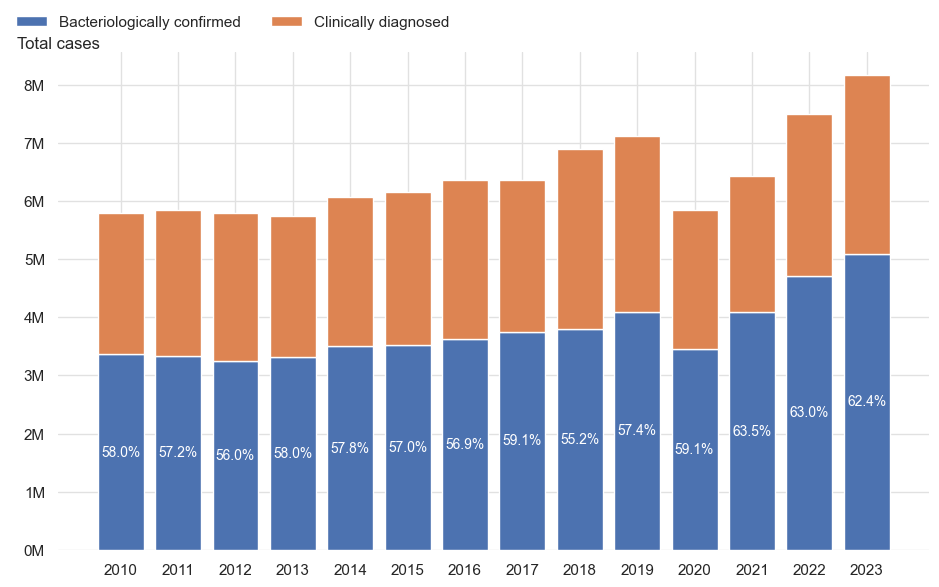

In [13]:
# Create the figure and axis objects
fig, ax1 = plt.subplots(figsize=(10, 6))

# Stacked bar chart for bacteriologically confirmed and clinically diagnosed cases
bar1 = ax1.bar(fig1['year'], fig1['bact_conf_abs'] / 1_000_000, 
               label='Bacteriologically confirmed', zorder=1)
bar2 = ax1.bar(fig1['year'], fig1['not_bact_conf_abs'] / 1_000_000, 
               bottom=fig1['bact_conf_abs'] / 1_000_000, 
               label='Clinically diagnosed', zorder=1)

# Add percentage text labels to the blue bars
for bar, pct in zip(bar1, fig1['bacconf_pct']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height / 2,  
             f'{pct * 100:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Set y-axis labels and formatting
ax1.set_ylabel('Total cases', rotation=0, labelpad=20)  # Rotate horizontally
ax1.yaxis.set_label_coords(0, 1)  # Adjust position (x, y coordinates above the axis)

# Custom y-axis formatter to append "M" for millions
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}M'))

# Remove vertical gridlines for clarity
# ax1.grid(axis='x', linestyle='--')

years = fig1['year'].unique()
filtered_years = [year for year in years if year != 2024]  # Exclude 2024
ax1.set_xticks(filtered_years)

# Add a legend above the plot
ax1.legend(loc='upper right', bbox_to_anchor=(0.465, 1.1), ncol=2, frameon=False)

# Show the plot
plt.tight_layout()
plt.show()


/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_1781/1621284497.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_1781/1621284497.py:51: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  color_patches = [mpatches.Patch(color=palette_map[i],
/var/folders/w9/4s00gf1j7sl8k190_53qgb7c0000gn/T/ipykernel_1781/1621284497.py:58: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  no_data_patch = mpatches.Patch(color='#d8d8d8',


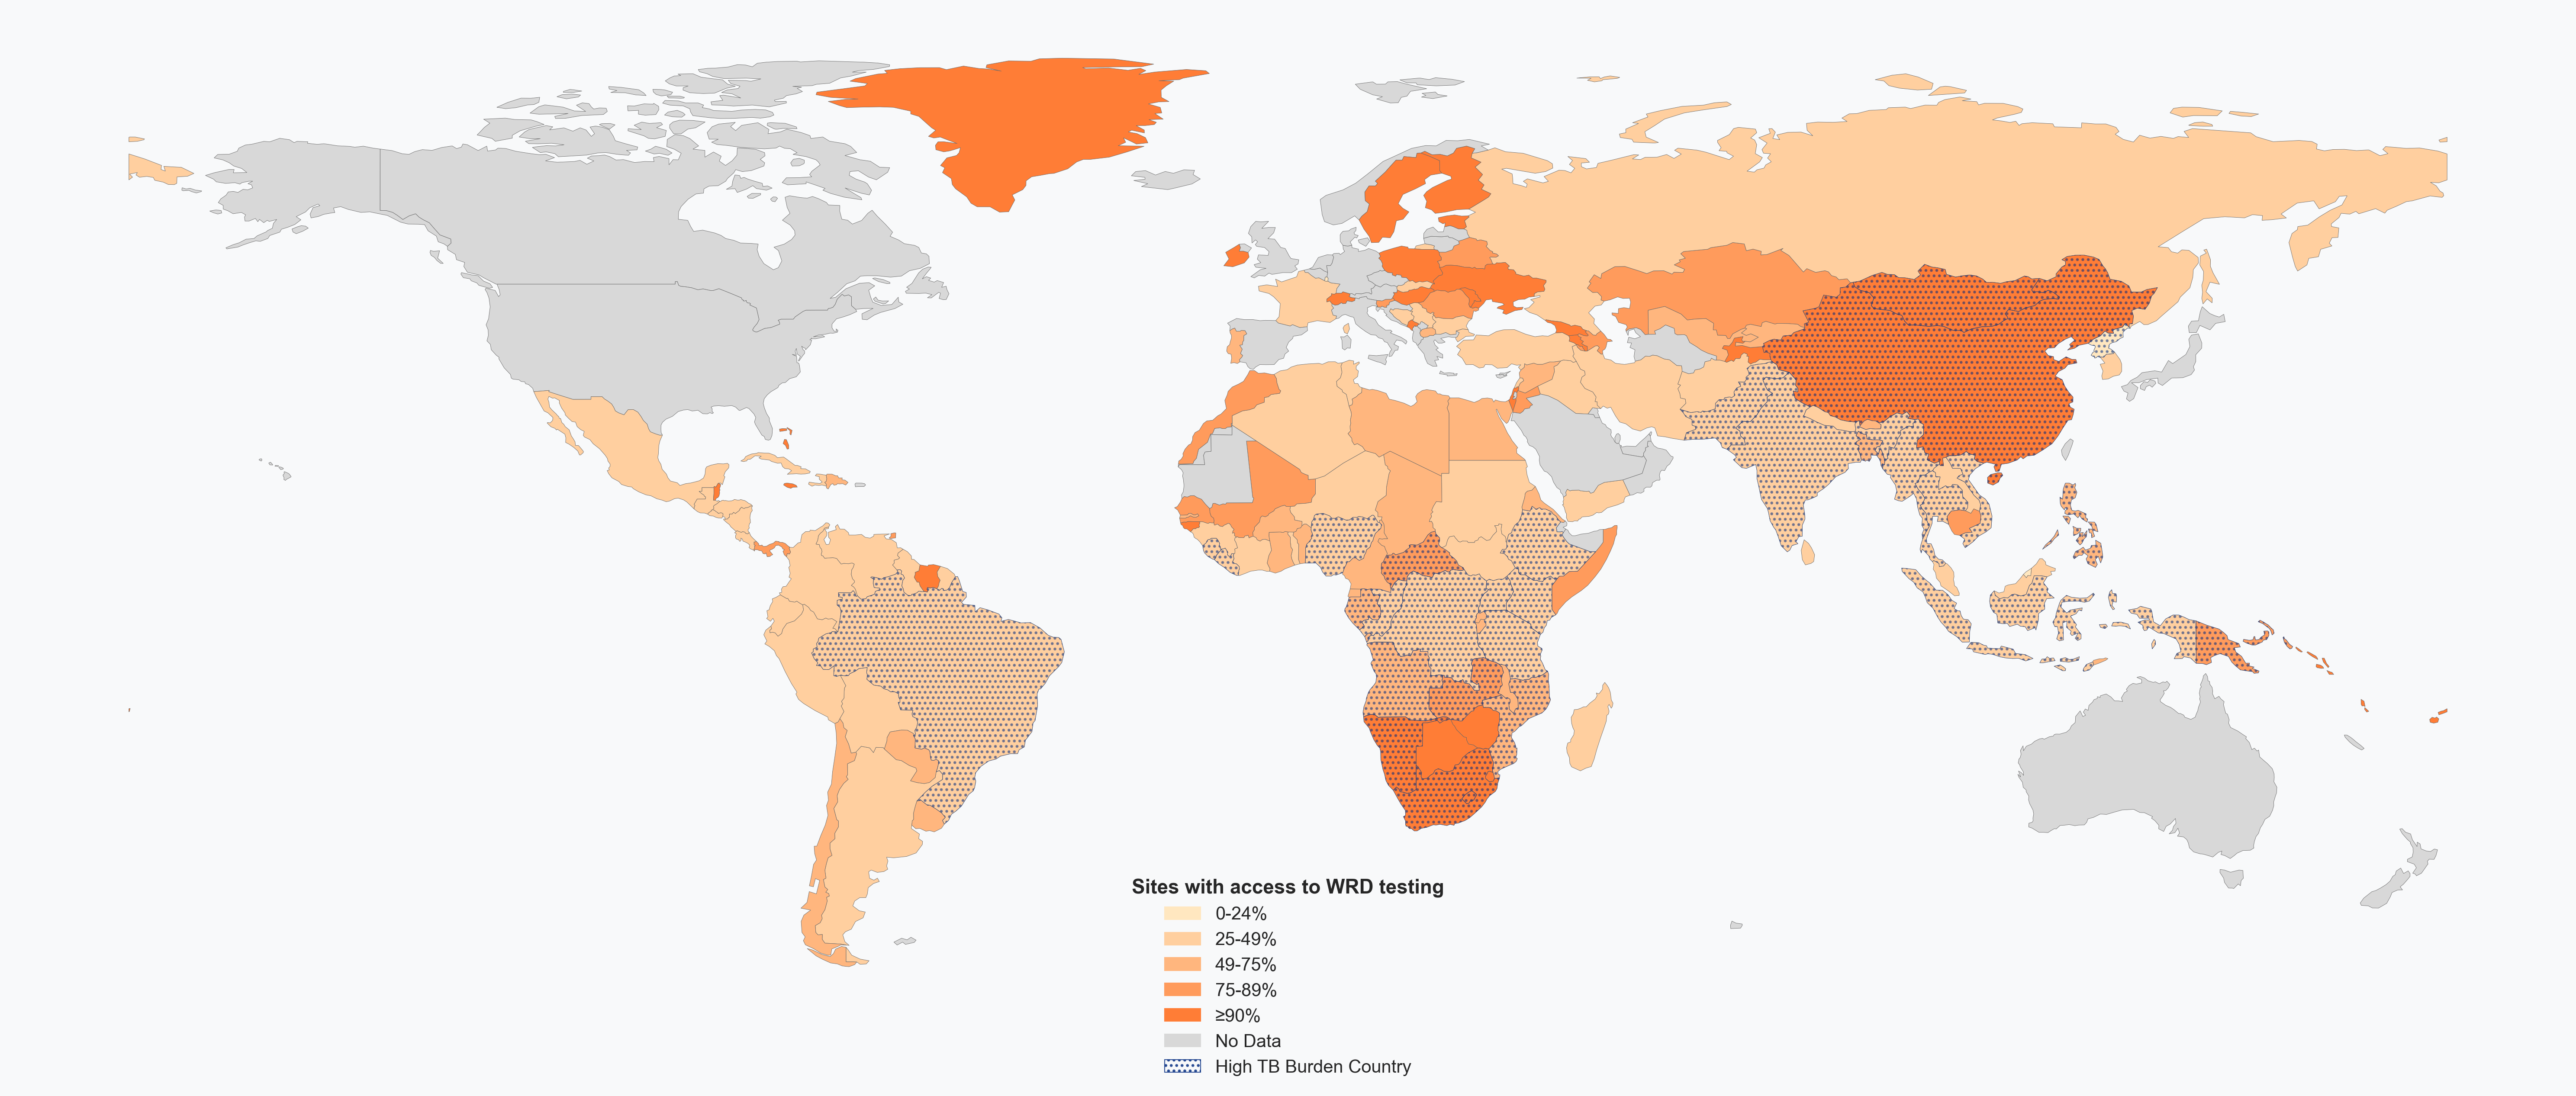

In [14]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
f2_2_8_map = world.merge(f2_2_8, how="left", left_on="iso_a3", right_on="iso3")
f2_2_8_map = f2_2_8_map[f2_2_8_map['continent'] != 'Antarctica']


# Define color palette and scale
palette_map = [  '#ffe7c0',  '#ffcf9f','#ffb67e',  '#ff9b5c','#ff7d36']
color_scale = [0, 25, 49, 75, 89]


# Function to get the color based on 'wrd_pct'
def get_color(wrd_pct):
    if pd.isna(wrd_pct):
        return '#d8d8d8'  # Grey for No Data
    wrd_pct = min(max(wrd_pct, 0), 100)
    for i, val in enumerate(color_scale):
        if wrd_pct <= val:
            return palette_map[i]
    return palette_map[-1]

# Apply the colors to the 'color' column
f2_2_8_map['color'] = f2_2_8_map['wrd_pct'].apply(get_color)

# Create figure with specific dimensions and DPI
fig, ax = plt.subplots(1, 1, figsize=(20, 12), dpi=300)

# Add background color
ax.set_facecolor('#F8F9FA')
fig.patch.set_facecolor('#F8F9FA')

# Plot the base map with custom colors
f2_2_8_map.plot(ax=ax, 
           color=f2_2_8_map['color'], 
           legend=False, 
           missing_kwds={'color': '#d8d8d8'},
           linewidth=0.2,  # Thinner borders
           edgecolor='#666666')  # Softer border color

# Add hatching for high burden countries with more subtle pattern
f2_2_8_map[f2_2_8_map['hbc30'] == 'g_hb_tb'].plot(
    ax=ax,
    color='None',
    hatch='....', 
    edgecolor='#002a80',
    linewidth=0.2,
    alpha=0.5
)

# Create custom legend with refined styling
legend_labels = ['0-24%', '25-49%', '49-75%', '75-89%', '≥90%']
color_patches = [mpatches.Patch(color=palette_map[i], 
                                label=legend_labels[i],
                                edgecolor='#666666',
                                linewidth=0.5) 
                for i in range(len(palette_map))]

# Add "No Data" label (for #d8d8d8)
no_data_patch = mpatches.Patch(color='#d8d8d8', 
                               label='No Data',
                               edgecolor='#666666',
                               linewidth=0.5)

# Add refined hatch pattern to legend
hatch_patch = mpatches.Patch(facecolor='None', 
                             hatch='....',
                             label='High TB Burden Country', 
                             edgecolor='#002a80',##
                             linewidth=0.5,
                             alpha=0.8)

# Combine all legend elements
all_patches = color_patches + [no_data_patch, hatch_patch]

# Add legend with refined styling
legend = ax.legend(handles=all_patches, 
                  title="Sites with access to WRD testing", 
                  loc='lower center',
                  bbox_to_anchor=(0.5, -0.08), 
                  fontsize=10)

# Style the legend title
legend.get_title().set_fontsize('11')
legend.get_title().set_fontweight('bold')

# Add title with better styling
#plt.title('Global Access to WRDs in TB diagnosis sites, 2023', 
        #  pad=20,
         # fontsize=16,
         # fontweight='bold')

# Add subtle caption
#plt.figtext(0.99, 0.01, 'Data source: WHO Global TB Database', 
 #           ha='right', 
  #          va='bottom', 
   #         fontsize=8, 
    #        style='italic',
     #       color='#666666')

# Remove axes
ax.set_axis_off()

# Adjust layout to prevent clipping
plt.tight_layout()

# Show the plot
plt.show()

In [15]:
#calculate number of g_hb_tb countries that have over 90% access to WRD
g_hb_tb = f2_2_8_map[f2_2_8_map['hbc30'] == 'g_hb_tb']
g_hb_tb_90 = g_hb_tb[g_hb_tb['wrd_pct'] >= 90]
g_hb_tb_90['country'].count()

5

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: Futur

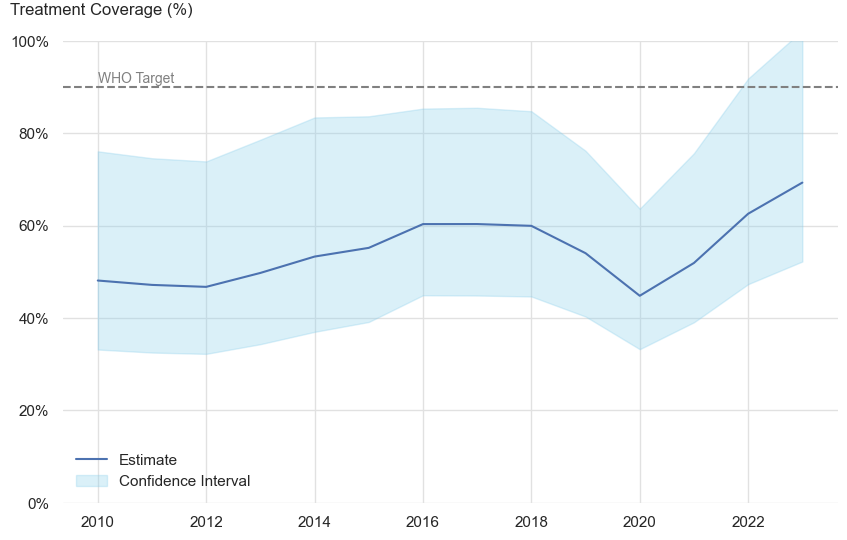

In [16]:
f2_3_3_pak = f2_3_3[f2_3_3['entity'] == 'Pakistan']

# Plot the main line
plt.figure(figsize=(10, 6))
wrd_pak = sns.lineplot(x='year', y='c_cdr', data=f2_3_3_pak, label='Estimate')

#adding Confidence intervals
plt.fill_between(f2_3_3_pak['year'], 
                 f2_3_3_pak['c_cdr_lo'], 
                 f2_3_3_pak['c_cdr_hi'], 
                 color='skyblue', 
                 alpha=0.3, 
                 label='Confidence Interval')


#wrd_pak.set_title('Estimated TB treatment coverage, Pakistan')
wrd_pak.ticklabel_format(style='plain', axis='y')
wrd_pak.set_ylim(0, 100)
wrd_pak.set_xlabel('')
wrd_pak.set_ylabel('Treatment Coverage (%)', rotation=0)

wrd_pak.yaxis.set_label_coords(0.05, 1.05)

wrd_pak.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x:.0f}%'))

#add horizontal line at 90% for reference
plt.axhline(y=90, color='grey', linestyle='--')
plt.text(2010, 91, 'WHO Target', color='grey', fontsize=10)


plt.legend()

# Display the plot
plt.show()


In [17]:
f2_3_5_all = est_country[est_country['year'] == report_year - 1][['iso3', 'year', 'inc.num']]
f2_3_5_all = f2_3_5_all.rename(columns={'inc.num': 'e_inc_num'})

# Link to notifications by merging
f2_3_5_all = f2_3_5_all.merge(notification, on=['year', 'iso3'])

# Select relevant columns
f2_3_5_all = f2_3_5_all[['iso3', 'country', 'e_inc_num', 'c_newinc']]

#Estimated number of incident cases (all forms) - Total of new and relapse cases and cases with unknown previous TB treatment history
f2_3_5_all['size'] = f2_3_5_all['e_inc_num'] - f2_3_5_all['c_newinc'] 


# Sort in descending order by gap size
f2_3_5_all = f2_3_5_all.sort_values(by='size', ascending=False)

### WHO benchmarks

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


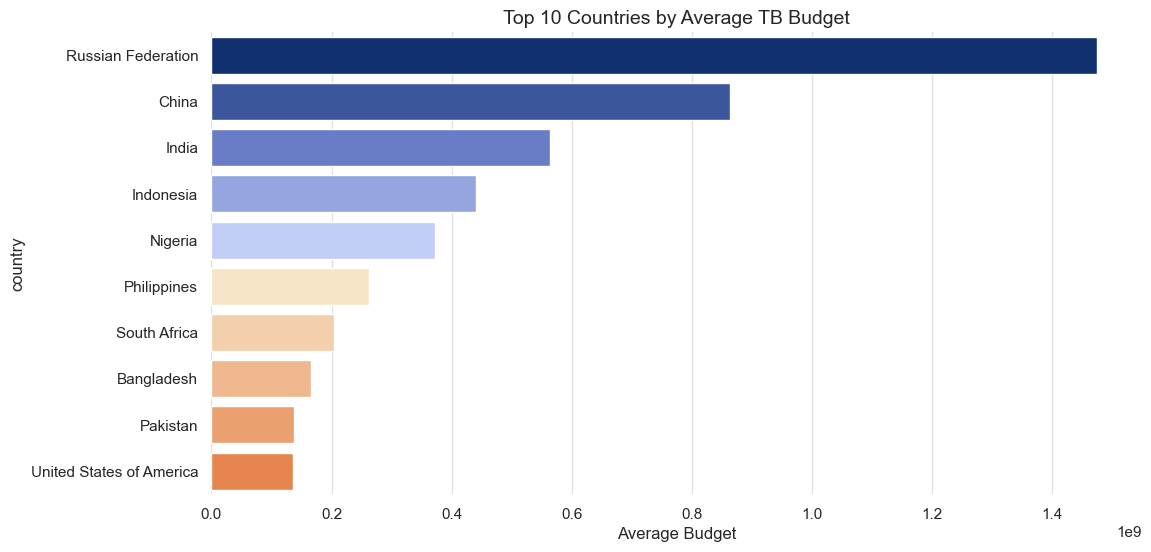

In [18]:
top_10_countries = budget.groupby('country')['budget_tot'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette=custom_palette)
plt.title('Top 10 Countries by Average TB Budget')
plt.xlabel('Average Budget')
plt.show()
